In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Styling

%matplotlib inline 
sns.set_style ("whitegrid")


In [3]:
#Load datasets

adhd_data = pd.read_csv("/Users/angadh/Desktop/Nexus/adhd_2018_features_tfidf_256.csv")
autism_data = pd.read_csv("/Users/angadh/Desktop/Nexus/autism_2018_features_tfidf_256.csv")

#First 1000

adhd_600 = adhd_data.head(600)
autism_600 = autism_data.head(600)


In [4]:
#Combine data testing -> automated_readability_index:

ari_combined = pd.DataFrame({
    
    "ADHD": adhd_600 ['automated_readability_index'],
    "Austim": autism_600 ['automated_readability_index']
    
})



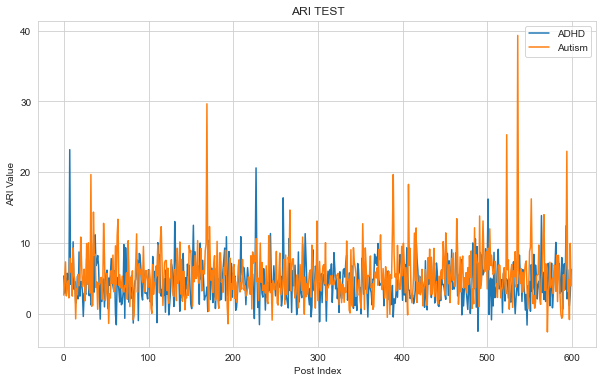

In [5]:
#Plotting data:

plt.figure(figsize=(10,6))

plt.plot(adhd_600['automated_readability_index'], label='ADHD')
plt.plot(autism_600['automated_readability_index'], label='Autism')

plt.title("ARI TEST")
plt.xlabel("Post Index")
plt.ylabel("ARI Value")

plt.legend()

plt.show()

In [6]:
#Further statistics:

adhd_description = adhd_600['automated_readability_index'].describe()
autism_description = autism_600['automated_readability_index'].describe()

print("\nADHD Descriptive Statistics:")
print(adhd_description)

print("\nAutism Descriptive Statistics:")
print(autism_description)



ADHD Descriptive Statistics:
count    600.000000
mean       4.543220
std        2.899863
min       -2.398070
25%        2.591525
50%        4.322931
75%        6.159581
max       23.210000
Name: automated_readability_index, dtype: float64

Autism Descriptive Statistics:
count    600.000000
mean       5.449998
std        3.685989
min       -2.498026
25%        3.254437
50%        4.930465
75%        7.024262
max       39.308163
Name: automated_readability_index, dtype: float64


In [7]:
#Further Further Statistics:

#Running Levene test to test for validity:

from scipy import stats

levene_stat, levene_p = stats.levene(adhd_600['automated_readability_index'], autism_600['automated_readability_index'])

print(f"Levene's Test: Stat={levene_stat}, P-Value={levene_p}")


Levene's Test: Stat=4.897162079233391, P-Value=0.027088815525661017


In [8]:
# P Value < 0.05 -> Equal Var = False -> We proceed with T-Test

In [9]:
t_stat, p_value = stats.ttest_ind(adhd_600['automated_readability_index'], autism_600['automated_readability_index'])

print(f"T-Test: T-Stat={t_stat}, P-Value={p_value}")


T-Test: T-Stat=-4.735952870654674, P-Value=2.4406521194653165e-06


**Very small P Value (Lower than extreme min value of 0.0001) indicates null hypothesis is NOT in effect and null hypothesis is REJECTED**

**Hence -> There is a significant reason behind the difference in values**

**T Test Value and Sign indicate ADHD have lower ARI than Autism to magnitude of 4.7**



# Main Statistical Analysis 

### ADHD, Addiction, Anxiety, Autism, BipolarReddit, BPD 

In [10]:
#Load datasets

adhd_data = pd.read_csv("/Users/angadh/Desktop/Nexus/adhd_2019_features_tfidf_256.csv")
autism_data = pd.read_csv("/Users/angadh/Desktop/Nexus/autism_2019_features_tfidf_256.csv")
addiction_data = pd.read_csv("/Users/angadh/Desktop/Nexus/addiction_2019_features_tfidf_256.csv")
anxiety_data = pd.read_csv("/Users/angadh/Desktop/Nexus/anxiety_2019_features_tfidf_256.csv")
BPD_data = pd.read_csv("/Users/angadh/Desktop/Nexus/bpd_2019_features_tfidf_256.csv")

#Subset of First 1250 records from datsets:

adhd_subset = adhd_data.head(1250)
autism_subset = autism_data.head(1250)
addiction_subset = addiction_data.head(1250)
anxiety_subset = anxiety_data.head(1250)
BPD_subset = BPD_data.head(1250)


In [11]:
#Combiniing data:

adhd_subset = adhd_data.head(1250).copy()
adhd_subset.loc[:, 'Condition'] = 'ADHD'

autism_subset = autism_data.head(1250).copy()
autism_subset.loc[:, 'Condition'] = 'Autism'

addiction_subset = addiction_data.head(1250).copy()
addiction_subset.loc[:, 'Condition'] = 'Addiction'

anxiety_subset = anxiety_data.head(1250).copy()
anxiety_subset.loc[:, 'Condition'] = 'Anxiety'

BPD_subset = BPD_data.head(1250).copy()
BPD_subset.loc[:, 'Condition'] = 'BPD'


In [12]:
#Combining the dataframes:

combined_data = pd.concat([adhd_subset, autism_subset, addiction_subset, anxiety_subset, BPD_subset], ignore_index=True)

In [13]:
#Defining and plotting linguistic statistics:

linguistic_stats = [
    
    'automated_readability_index', 
    'automated_readability_index',
    'flesch_kincaid_grade_level',
    'flesch_reading_ease',
    'gulpease_index',
    'gunning_fog_index',
    'lix',
    'smog_index',
    'wiener_sachtextformel'    
]



In [14]:
#Plot funnctions:

#Boxplot Statistic Function

def plot_boxplot(statistic):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Condition', y=statistic, data=combined_data)
    plt.title(f'Comparison of {statistic} Across Conditions')
    plt.ylabel(statistic)
    plt.xlabel('Condition')
    plt.show()
    
#Strip plot Statistic Function

def plot_strip(statistic):
    plt.figure(figsize=(12, 6))
    sns.stripplot(x='Condition', y=statistic, data=combined_data, jitter=True)
    plt.title(f'Comparison of {statistic} Across Conditions')
    plt.ylabel(statistic)
    plt.xlabel('Condition')
    plt.show()
    
#Swarm plot Statistic Function:

def plot_swarm(statistic):
    plt.figure(figsize=(21, 6))
    sns.swarmplot(x='Condition', y=statistic, data=combined_data, size = 3)
    plt.title(f'Comparison of {statistic} Across Conditions')
    plt.ylabel(statistic)
    plt.xlabel('Condition')
    plt.show()
    

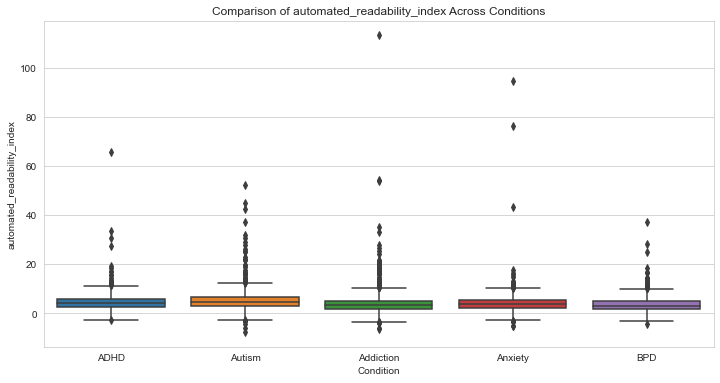

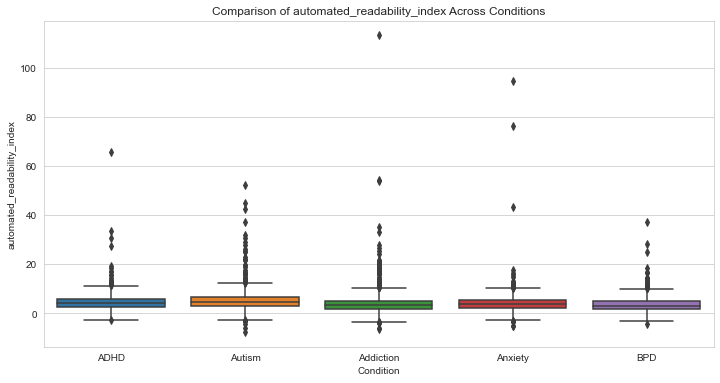

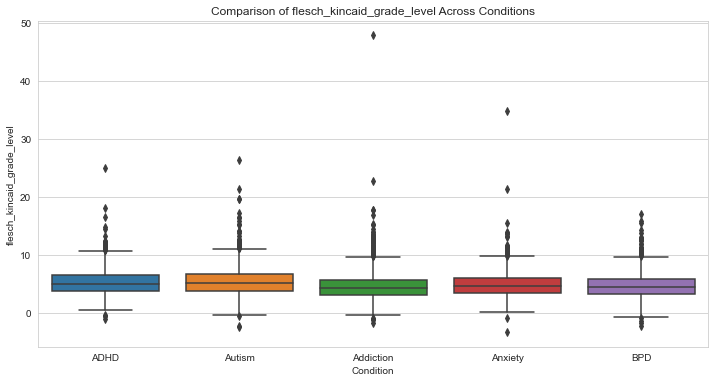

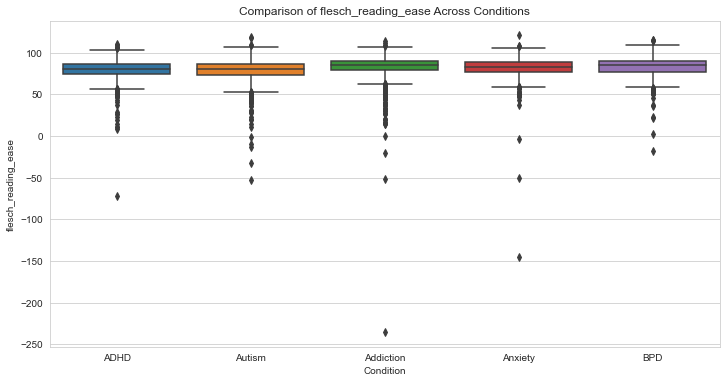

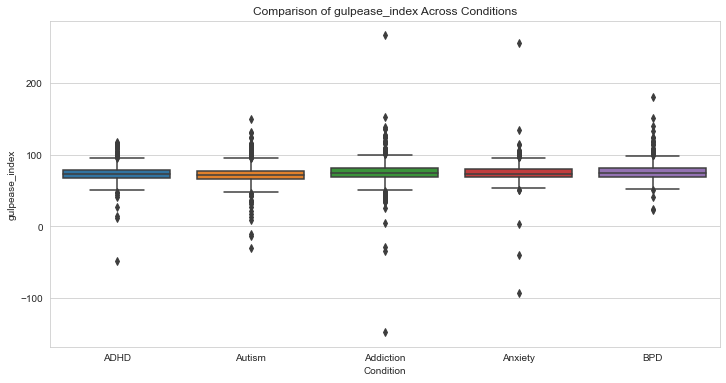

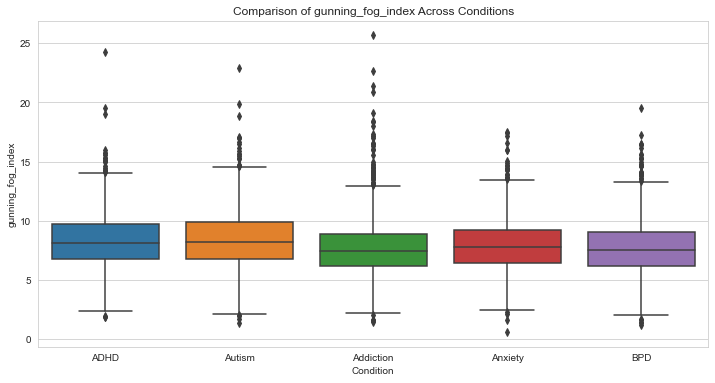

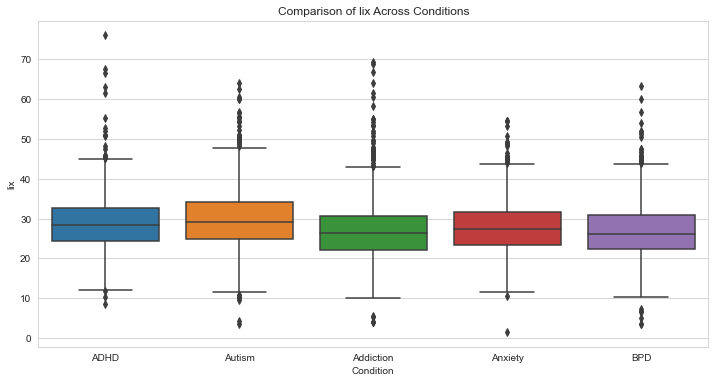

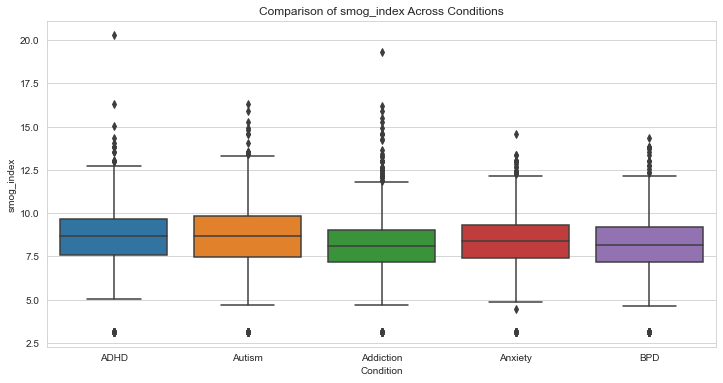

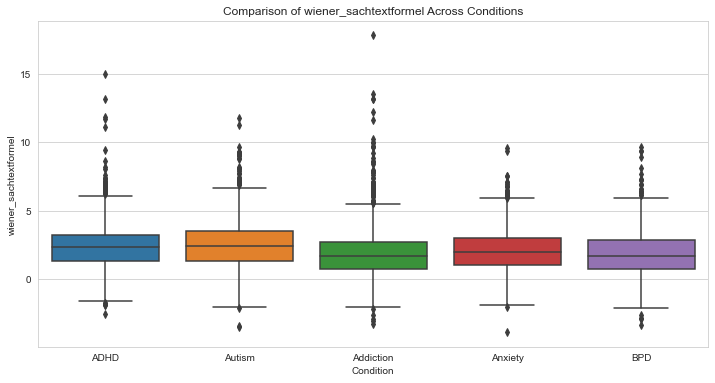

In [15]:
#Plotting Boxplot:

for stat in linguistic_stats:
    plot_boxplot(stat)

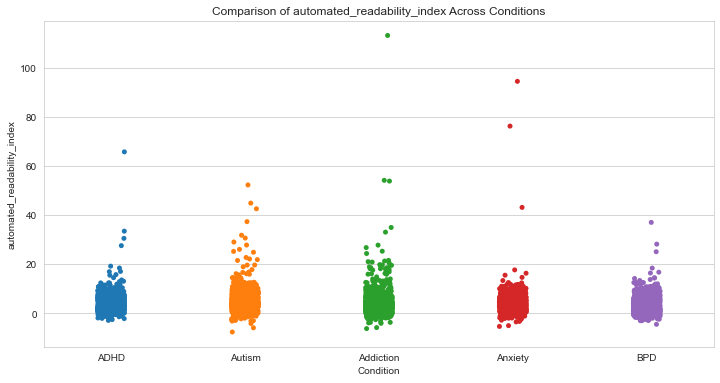

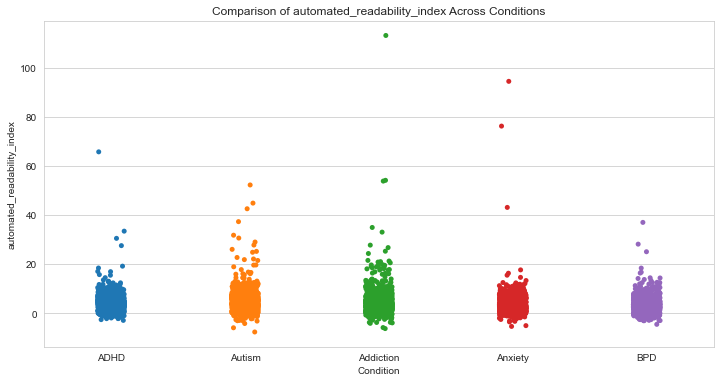

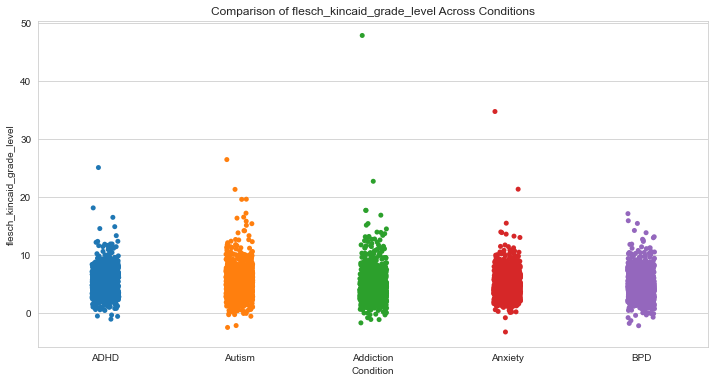

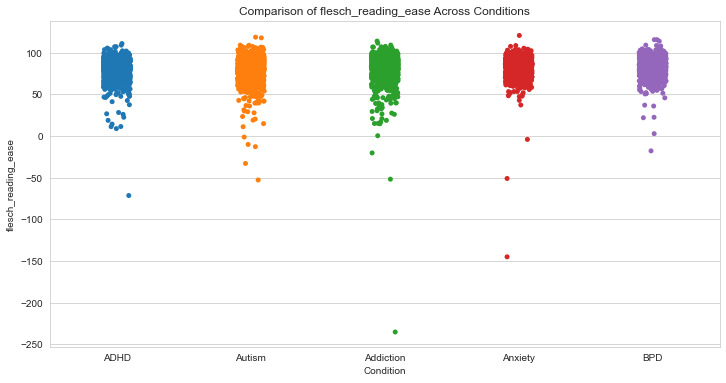

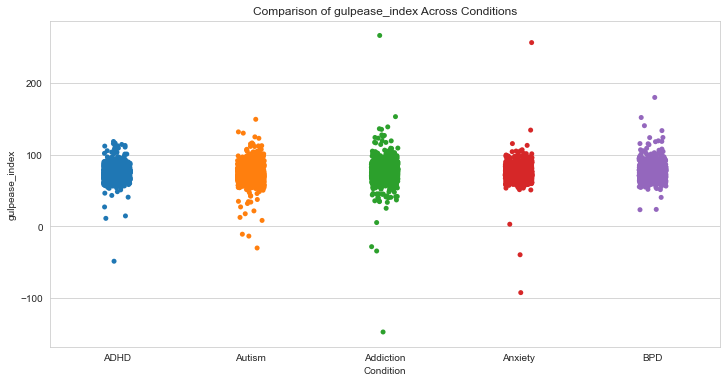

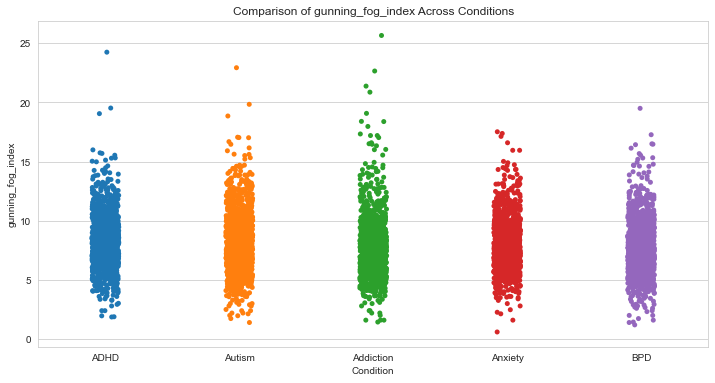

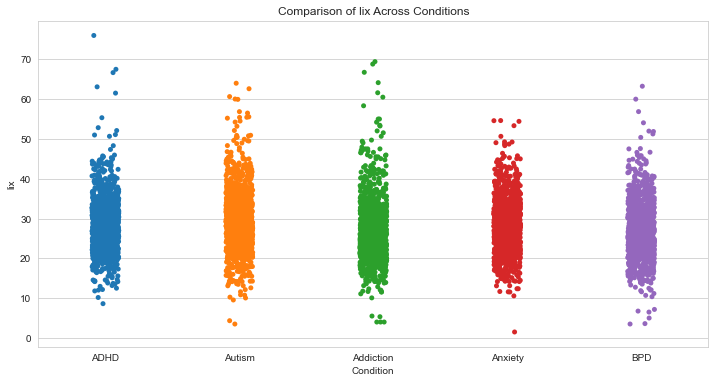

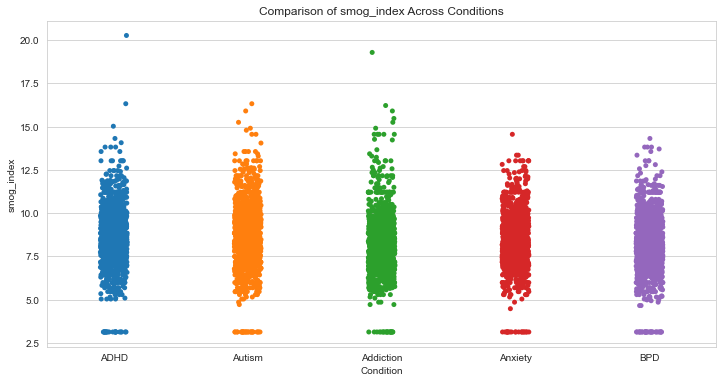

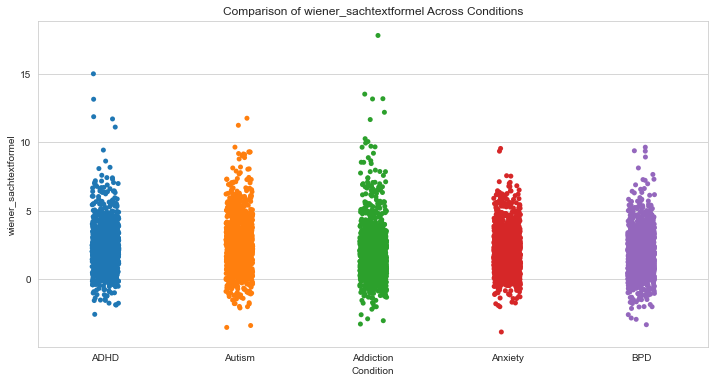

In [16]:
#Plotting Strip Plot:

for stat in linguistic_stats:
    plot_strip(stat)

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packa

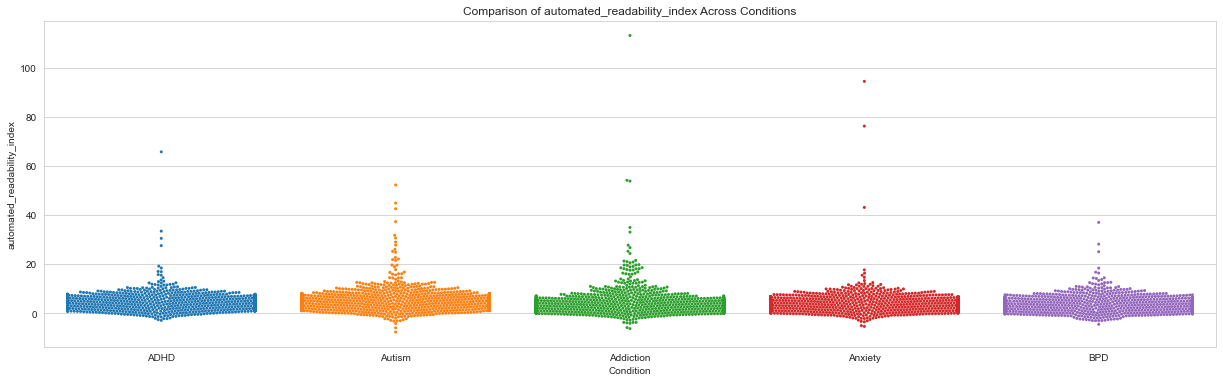

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packa

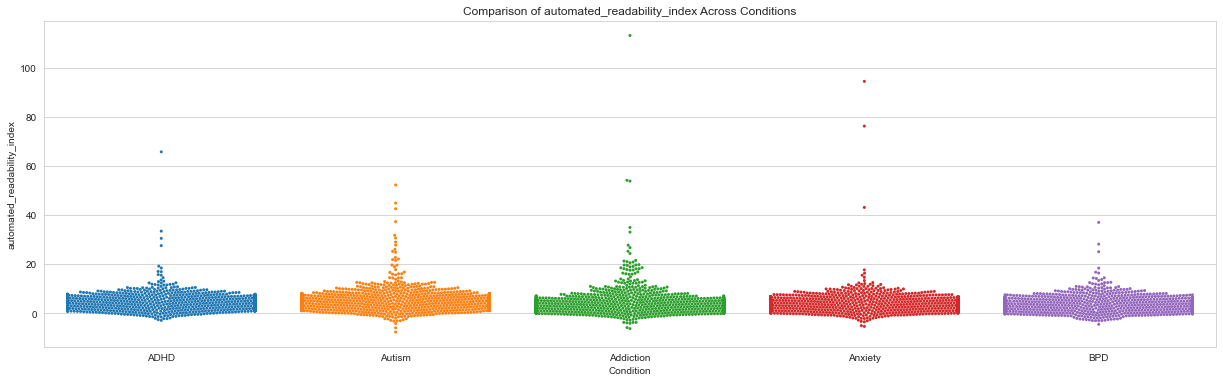

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packa

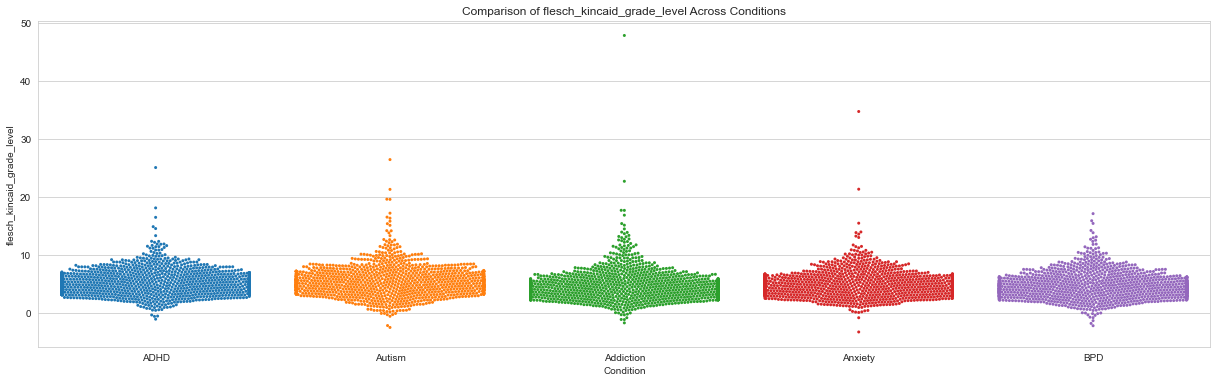

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packa

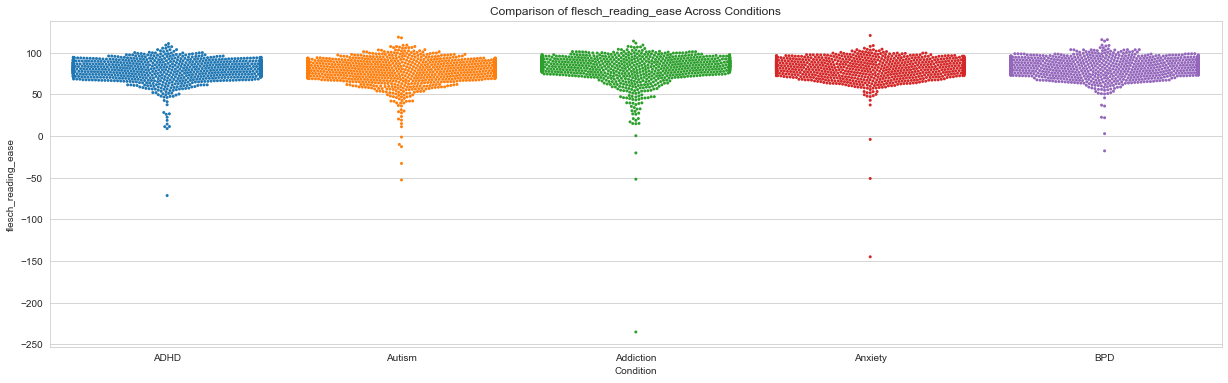

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packa

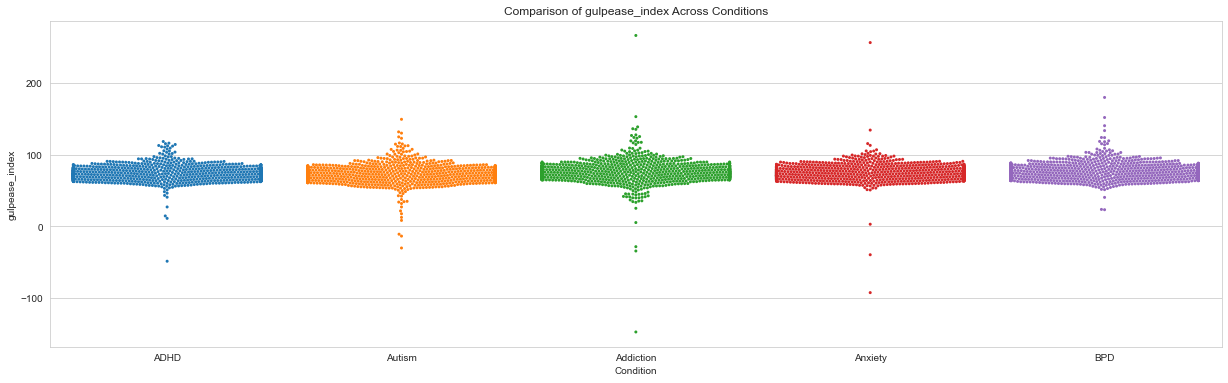

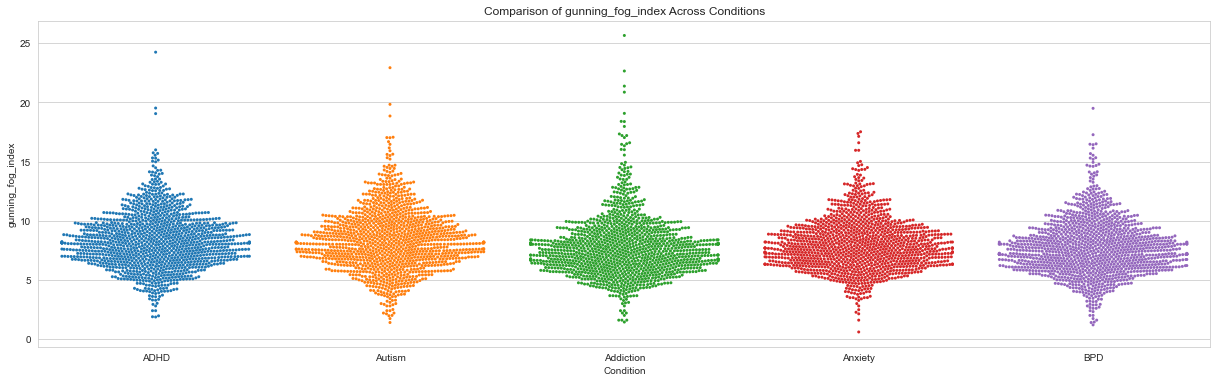

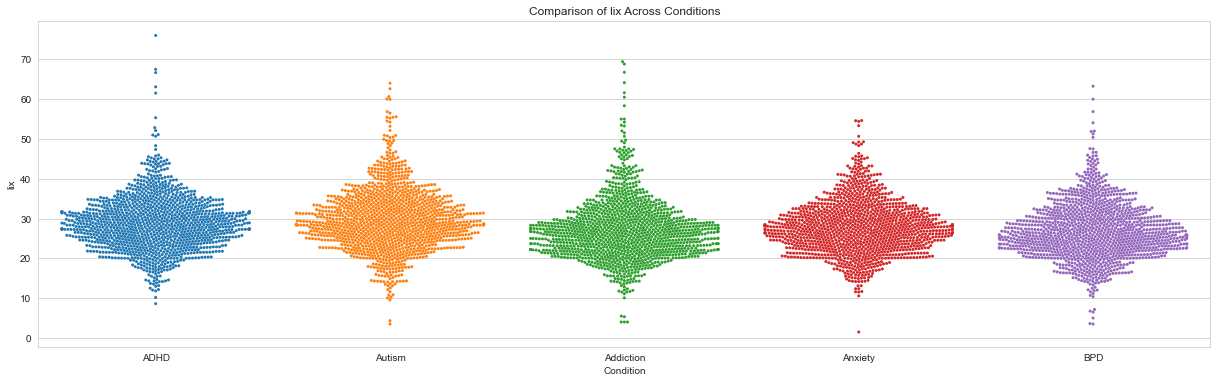

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


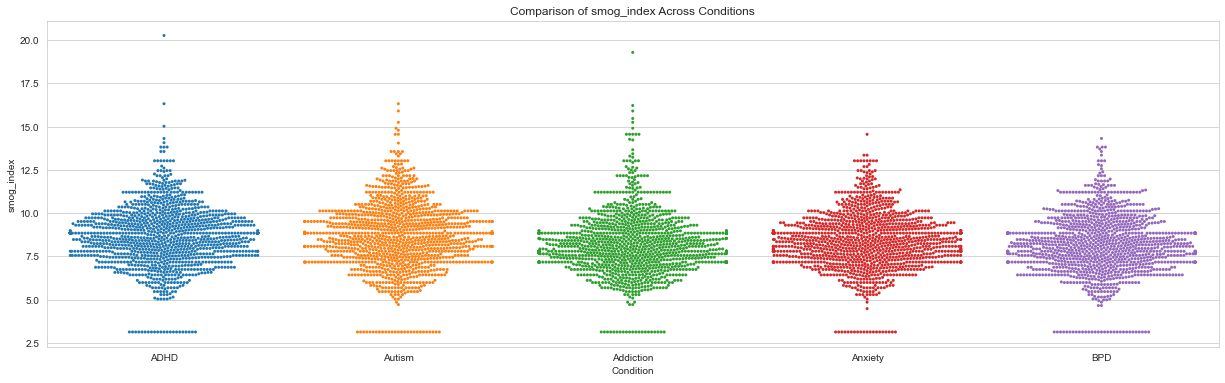

/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angadh/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


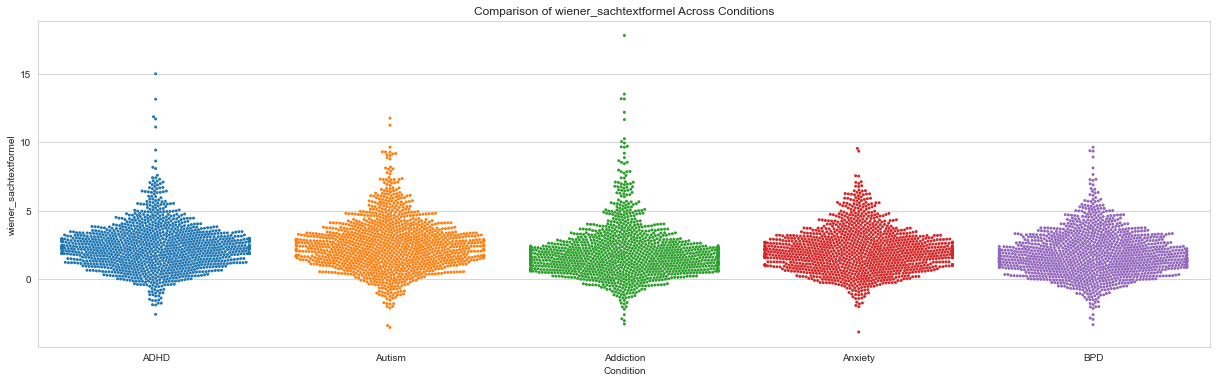

In [17]:
#Plotting Box Plot:

for stat in linguistic_stats:
    plot_swarm(stat)

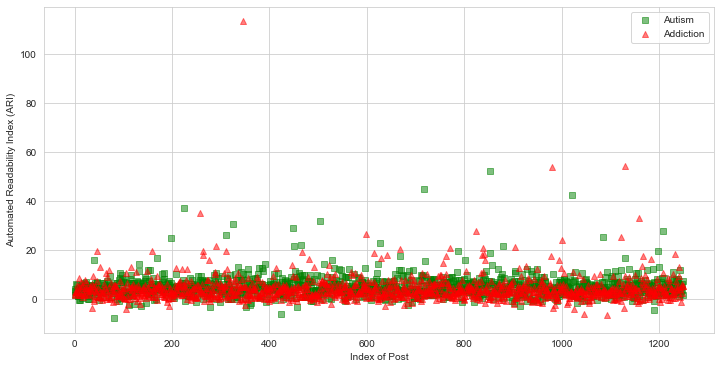

In [18]:
import matplotlib.pyplot as plt

# Assuming each of your subsets is already loaded and has an 'ARI' column

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)

# Define markers for each dataset
markers = ['o', 's', '^', 'P', '*']  # Circle, square, triangle up, plus (filled), star

# Plot each dataset with a different marker
#ax.scatter(adhd_subset.index, adhd_subset['automated_readability_index'], c='blue', label='ADHD', alpha=0.5, marker=markers[0])
ax.scatter(autism_subset.index, autism_subset['automated_readability_index'], c='green', label='Autism', alpha=0.5, marker=markers[1])
ax.scatter(addiction_subset.index, addiction_subset['automated_readability_index'], c='red', label='Addiction', alpha=0.5, marker=markers[2])
#ax.scatter(anxiety_subset.index, anxiety_subset['automated_readability_index'], c='purple', label='Anxiety', alpha=0.5, marker=markers[3])
#ax.scatter(BPD_subset.index, BPD_subset['automated_readability_index'], c='orange', label='BPD', alpha=0.5, marker=markers[4])


# Label the axes
plt.xlabel('Index of Post')
plt.ylabel('Automated Readability Index (ARI)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
